In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Modelo 1

## Distancias entre 100 e 1000um

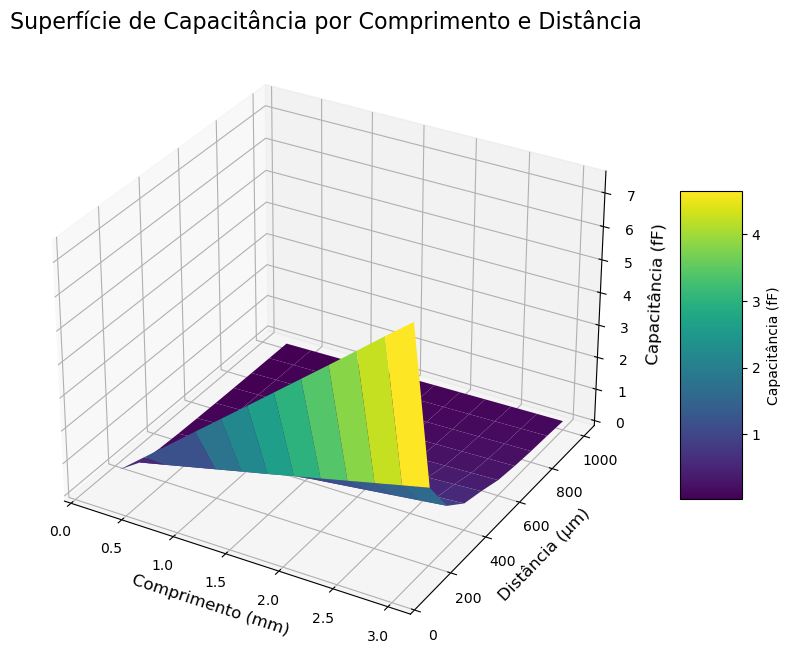

In [20]:
data1 = {
    'Comprimento (mm)': [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0],
    'Distância (µm)': [10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'Capacitância (fF)': [
        -7.44349, -0.51015, -0.20609, -0.12592, -0.09065, -0.0709, -0.05465, -0.04392, -0.03588, -0.03045, -0.02446, #l=0.25mm
        -23.34691, -1.14404, -0.38434, -0.21511, -0.14075, -0.11088, -0.07856, -0.06126, -0.04916, -0.04163, -0.03278, #l=0.5mm
        -55.1811, -2.41352, -0.74523, -0.39571, -0.24401, -0.19187, -0.12725, -0.09706, -0.07728, -0.06445, -0.04967, 
        -71.15746, -3.04186, -0.92678, -0.48591, -0.29588, -0.23257, -0.15248, -0.11528, -0.09151, -0.07714, -0.05883, 
        -86.95884, -3.67349, -1.10375, -0.57491, -0.34744, -0.27107, -0.17531, -0.13221, -0.10546, -0.08802, -0.06744, 
        -102.51412, -4.30633, -1.28996, -0.66852, -0.40033, -0.31182, -0.20209, -0.15226, -0.12073, -0.10165, -0.07709, 
        -118.14665, -4.94134, -1.47223, -0.75957, -0.45391, -0.35432, -0.22717, -0.1712, -0.13553, -0.11341, -0.08626, 
        -134.07337, -5.57507, -1.65591, -0.85103, -0.50732, -0.39339, -0.2524, -0.1899, -0.15031, -0.12584, -0.09583, 
        -149.81971, -6.21497, -1.84003, -0.94395, -0.56107, -0.43274, -0.27844, -0.20852, -0.16463, -0.13878, -0.10497, 
        -166.29534, -6.86023, -2.02414, -1.03626, -0.61402, -0.47439, -0.30284, -0.22848, -0.18013, -0.15111, -0.11367, 
        -181.56762, -7.48684, -2.20653, -1.12897, -0.66739, -0.51423, -0.3286, -0.24655, -0.19499, -0.16422, -0.12288]
}
df1 = pd.DataFrame(data1)

# 1. Desconsiderar a menor distância
df_filtrado = df1[df1['Distância (µm)'] != 10].copy()

# 2. Deixar os valores de capacitância positivos
df_filtrado['Capacitância (fF)'] = df_filtrado['Capacitância (fF)'].abs()

# 3. Preparar os dados para o gráfico de superfície (formato de grade)
# O método pivot transforma o DataFrame do formato "longo" para o "largo" (grade)
df_pivot = df_filtrado.pivot(index='Distância (µm)', columns='Comprimento (mm)', values='Capacitância (fF)')

# Extrair os eixos X, Y e os valores de Z da grade
X_vals = df_pivot.columns.values
Y_vals = df_pivot.index.values
X, Y = np.meshgrid(X_vals, Y_vals)
Z = df_pivot.values

# 4. Criar o gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotar a superfície
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Configurar os eixos e títulos
ax.set_title('Superfície de Capacitância por Comprimento e Distância', fontsize=16)
ax.set_xlabel('Comprimento (mm)', fontsize=12)
ax.set_ylabel('Distância (µm)', fontsize=12)
ax.set_zlabel('Capacitância (fF)', fontsize=12)

# Adicionar uma barra de cores para a legenda dos valores de Z
fig.colorbar(surf, shrink=0.5, aspect=5, label='Capacitância (fF)')

# Forçar a origem dos eixos X e Y em 0,0
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_zlim(bottom=0) 

plt.show()

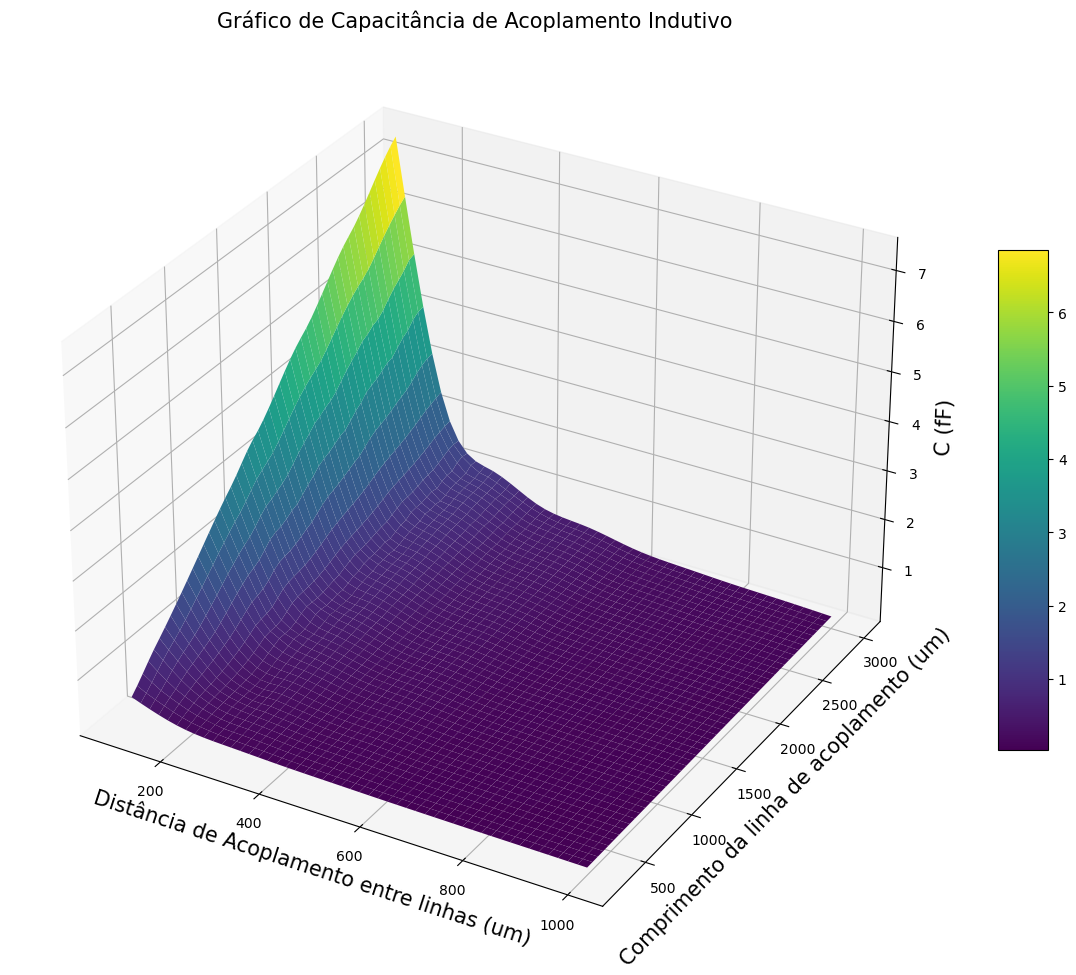

In [21]:
# Método do Diego
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Dados fornecidos
d = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
lc = np.array([250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000])
C_values = np.array([
    [0.51015, 0.20609, 0.12592, 0.09065, 0.0709, 0.05465, 0.04392, 0.03588, 0.03045, 0.02446], #l=0.25mm
    [1.14404, 0.38434, 0.21511, 0.14075, 0.11088, 0.07856, 0.06126, 0.04916, 0.04163, 0.03278], #l=0.5mm
    [2.41352, 0.74523, 0.39571, 0.24401, 0.19187, 0.12725, 0.09706, 0.07728, 0.06445, 0.04967], #l=1mm
    [3.04186, 0.92678, 0.48591, 0.29588, 0.23257, 0.15248, 0.11528, 0.09151, 0.07714, 0.05883], #l=1.25mm
    [3.67349, 1.10375, 0.57491, 0.34744, 0.27107, 0.17531, 0.13221, 0.10546, 0.08802, 0.06744], #l=1.5mm
    [4.30633, 1.28996, 0.66852, 0.40033, 0.31182, 0.20209, 0.15226, 0.12073, 0.10165, 0.07709], #l=1.75mm
    [4.94134, 1.47223, 0.75957, 0.45391, 0.35432, 0.22717, 0.1712, 0.13553, 0.11341, 0.08626], #l=2mm
    [5.57507, 1.65591, 0.85103, 0.50732, 0.39339, 0.2524, 0.1899, 0.15031, 0.12584, 0.09583], #l=2.25mm
    [6.21497, 1.84003, 0.94395, 0.56107, 0.43274, 0.27844, 0.20852, 0.16463, 0.13878, 0.10497], #l=2.5mm
    [6.86023, 2.02414, 1.03626, 0.61402, 0.47439, 0.30284, 0.22848, 0.18013, 0.15111, 0.11367], #l=2.75mm
    [7.48684, 2.20653, 1.12897, 0.66739, 0.51423, 0.3286, 0.24655, 0.19499, 0.16422, 0.12288] #l=3mm
]).T

# Criando a grade de interpolação
D, Lc = np.meshgrid(np.linspace(d.min(), d.max(), 50), np.linspace(lc.min(), lc.max(), 50))
points = np.array([(di, lci) for di in d for lci in lc])
values = C_values.flatten()
C_interp = griddata(points, values, (D, Lc), method='cubic')

# Criando a figura 3D
fig = plt.figure(figsize=(15, 13))
ax = fig.add_subplot(111, projection='3d')

# Plotando a superfície interpolada
surf = ax.plot_surface(D, Lc, C_interp, cmap='viridis', edgecolor='none')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

# Rótulos dos eixos
ax.set_xlabel('Distância de Acoplamento entre linhas (um)', fontsize=15)
ax.set_ylabel('Comprimento da linha de acoplamento (um)', fontsize=15)
ax.set_zlabel('C (fF)', fontsize=15)
ax.set_title('Gráfico de Capacitância de Acoplamento Indutivo', fontsize=15)

# Exibindo o gráfico
plt.show()

## Distâncias entre 10 e 100 um

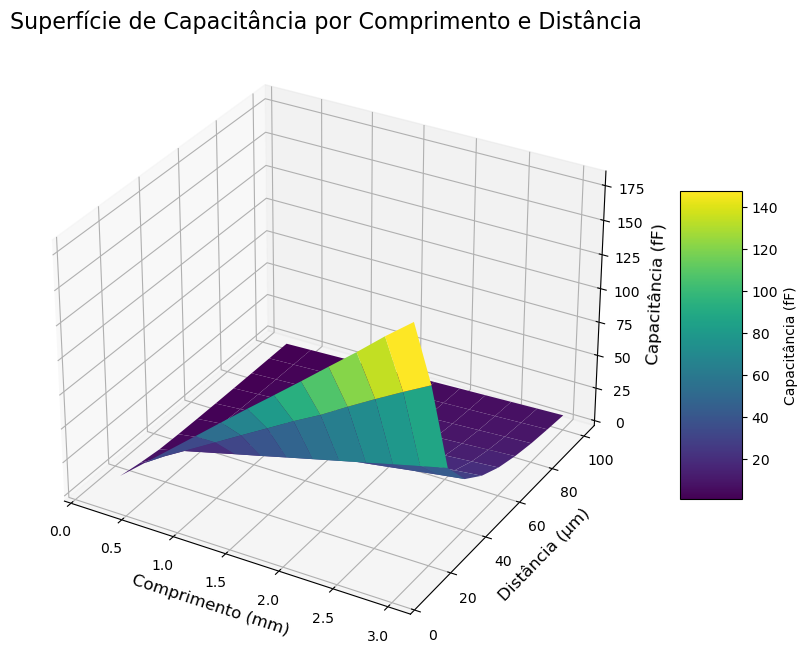

In [8]:
data1 = {
    'Comprimento (mm)': [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0],
    'Distância (µm)': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, ],
    'Capacitância (fF)': [
        -7.44349, -4.57374, -2.42392, -1.69362, -1.26934, -0.99029, -0.80536, -0.67944, -0.58712, -0.51015, #l=0.25mm
        -23.34691, -15.78588, -7.21642, -4.64871, -3.31759, -2.48330, -1.94971, -1.59232, -1.34732, -1.14404, #l=0.5mm
        -55.1811, -38.19295, -16.86268, -10.59055, -7.41747, -5.48050, -4.23117, -3.41238, -2.86691,-2.41352, #l=1mm
        -71.15746, -49.40971, -21.60734, -13.5647, -9.47785, -6.98287, -5.37988, -4.31614, -3.62244, -3.04186, #l=1.25mm
        -86.95884, -60.50366, -26.46655, -16.51036, -11.49947, -8.46002, -6.51865, -5.23014, -4.37247, -3.67349, #l=1.5mm
        -102.51412, -71.68452, -31.26583, -19.48614, -13.56111, -9.97422, -7.67826, -6.12571, -5.12469, -4.30633, #l=1.75mm
        -118.14665, -82.07160, -36.05388, -22.54284, -15.70175, -11.48056, -8.81943, -7.02137, -5.87484, -4.94134, #l=2mm
        -134.07337, -93.79644, -40.77429, -25.49456, -17.75012, -12.96455, -9.98785, -7.96077, -6.63177, -5.57507, #l=2.25mm
        -149.81971, -105.07654, -45.66051, -28.50098, -19.86220, -14.49460, -11.13628, -8.87108, -7.40800, -6.21497, #l=2.5mm
        -166.29534, -115.92900, -50.38771, -31.44036, -21.98159, -16.00757, -12.31854, -9.83690, -8.18736, -6.86023, #l=2.75mm
        -181.56762, -126.36801, -55.07894, -34.26504, -23.99616, -17.48828, -13.44408, -10.70722, -8.95262, -7.48684, #l=3mm
        ]
}
df1 = pd.DataFrame(data1)

# 1. Desconsiderar a menor distância
#df_filtrado = df1[df1['Distância (µm)'] != 10].copy()

# 2. Deixar os valores de capacitância positivos
df1['Capacitância (fF)'] = df1['Capacitância (fF)'].abs()

# 3. Preparar os dados para o gráfico de superfície (formato de grade)
# O método pivot transforma o DataFrame do formato "longo" para o "largo" (grade)
df_pivot = df1.pivot(index='Distância (µm)', columns='Comprimento (mm)', values='Capacitância (fF)')

# Extrair os eixos X, Y e os valores de Z da grade
X_vals = df_pivot.columns.values
Y_vals = df_pivot.index.values
X, Y = np.meshgrid(X_vals, Y_vals)
Z = df_pivot.values

# 4. Criar o gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotar a superfície
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Configurar os eixos e títulos
ax.set_title('Superfície de Capacitância por Comprimento e Distância', fontsize=16)
ax.set_xlabel('Comprimento (mm)', fontsize=12)
ax.set_ylabel('Distância (µm)', fontsize=12)
ax.set_zlabel('Capacitância (fF)', fontsize=12)

# Adicionar uma barra de cores para a legenda dos valores de Z
fig.colorbar(surf, shrink=0.5, aspect=5, label='Capacitância (fF)')

# Forçar a origem dos eixos X e Y em 0,0
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_zlim(bottom=0) 

plt.show()

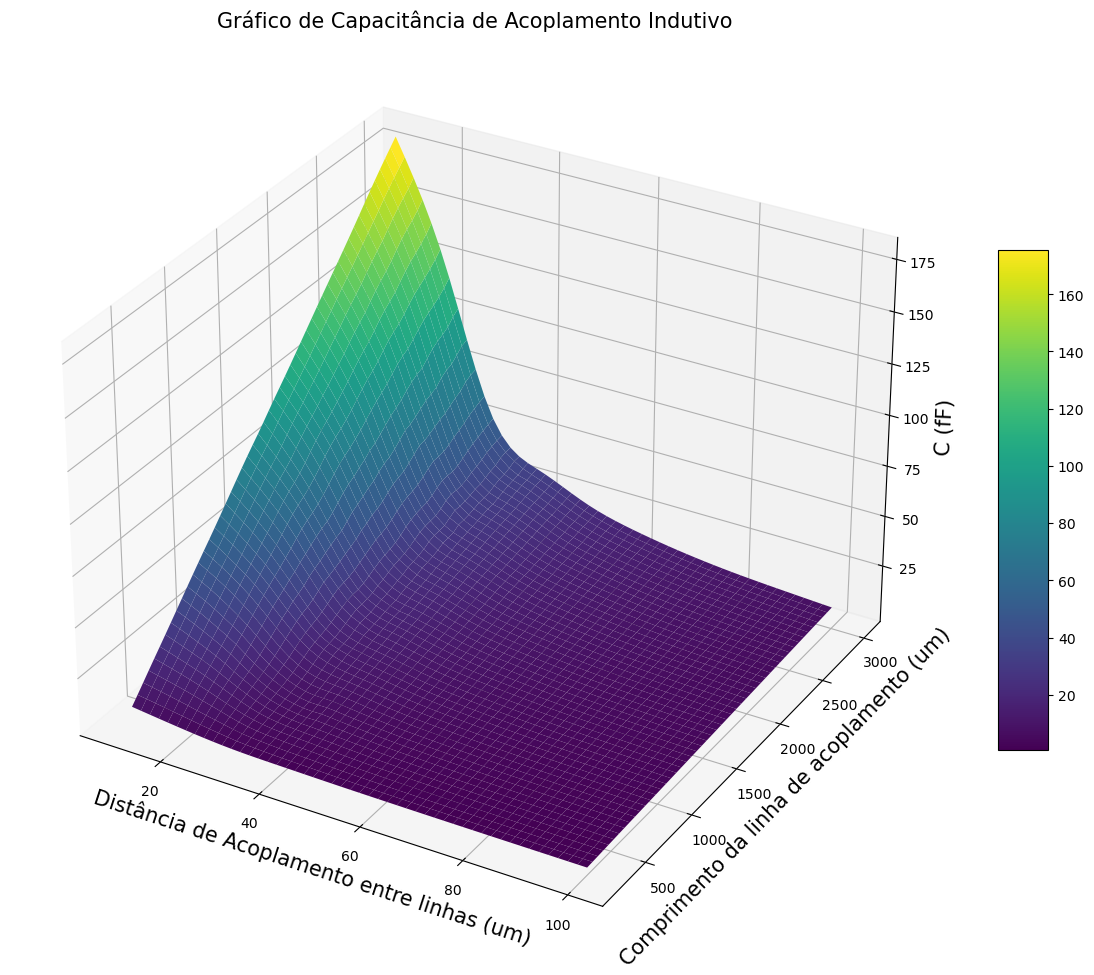

In [18]:
# Método do Diego
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Dados fornecidos
d = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
lc = np.array([250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000])
C_values = np.array([
    [7.44349, 4.57374, 2.42392, 1.69362, 1.26934, 0.99029, 0.80536, 0.67944, 0.58712, 0.51015], #l=0.25mm
    [23.34691, 15.78588, 7.21642, 4.64871, 3.31759, 2.48330, 1.94971, 1.59232, 1.34732, 1.14404], #l=0.5mm
    [55.1811, 38.19295, 16.86268, 10.59055, 7.41747, 5.48050, 4.23117, 3.41238, 2.86691, 2.41352], #l=1mm
    [71.15746, 49.40971, 21.60734, 13.5647, 9.47785, 6.98287, 5.37988, 4.31614, 3.62244, 3.04186], #l=1.25mm
    [86.95884, 60.50366, 26.46655, 16.51036, 11.49947, 8.46002, 6.51865, 5.23014, 4.37247, 3.67349], #l=1.5mm
    [102.51412, 71.68452, 31.26583, 19.48614, 13.56111, 9.97422, 7.67826, 6.12571, 5.12469, 4.30633], #l=1.75mm
    [118.14665, 82.07160, 36.05388, 22.54284, 15.70175, 11.48056, 8.81943, 7.02137, 5.87484, 4.94134], #l=2mm
    [134.07337, 93.79644, 40.77429, 25.49456, 17.75012, 12.96455, 9.98785, 7.96077, 6.63177, 5.57507], #l=2.25mm
    [149.81971, 105.07654, 45.66051, 28.50098, 19.86220, 14.49460, 11.13628, 8.87108, 7.40800, 6.21497], #l=2.5mm
    [166.29534, 115.92900, 50.38771, 31.44036, 21.98159, 16.00757, 12.31854, 9.83690, 8.18736, 6.86023], #l=2.75mm
    [181.56762, 126.36801, 55.07894, 34.26504, 23.99616, 17.48828, 13.44408, 10.70722, 8.95262, 7.48684] #l=3mm
]).T

# Criando a grade de interpolação
D, Lc = np.meshgrid(np.linspace(d.min(), d.max(), 50), np.linspace(lc.min(), lc.max(), 50))
points = np.array([(di, lci) for di in d for lci in lc])
values = C_values.flatten()
C_interp = griddata(points, values, (D, Lc), method='cubic')

# Criando a figura 3D
fig = plt.figure(figsize=(15, 13))
ax = fig.add_subplot(111, projection='3d')

# Plotando a superfície interpolada
surf = ax.plot_surface(D, Lc, C_interp, cmap='viridis', edgecolor='none')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

# Rótulos dos eixos
ax.set_xlabel('Distância de Acoplamento entre linhas (um)', fontsize=15)
ax.set_ylabel('Comprimento da linha de acoplamento (um)', fontsize=15)
ax.set_zlabel('C (fF)', fontsize=15)
ax.set_title('Gráfico de Capacitância de Acoplamento Indutivo', fontsize=15)

# Exibindo o gráfico
plt.show()


## Distâncias de 10 a 1000um com mais pontos

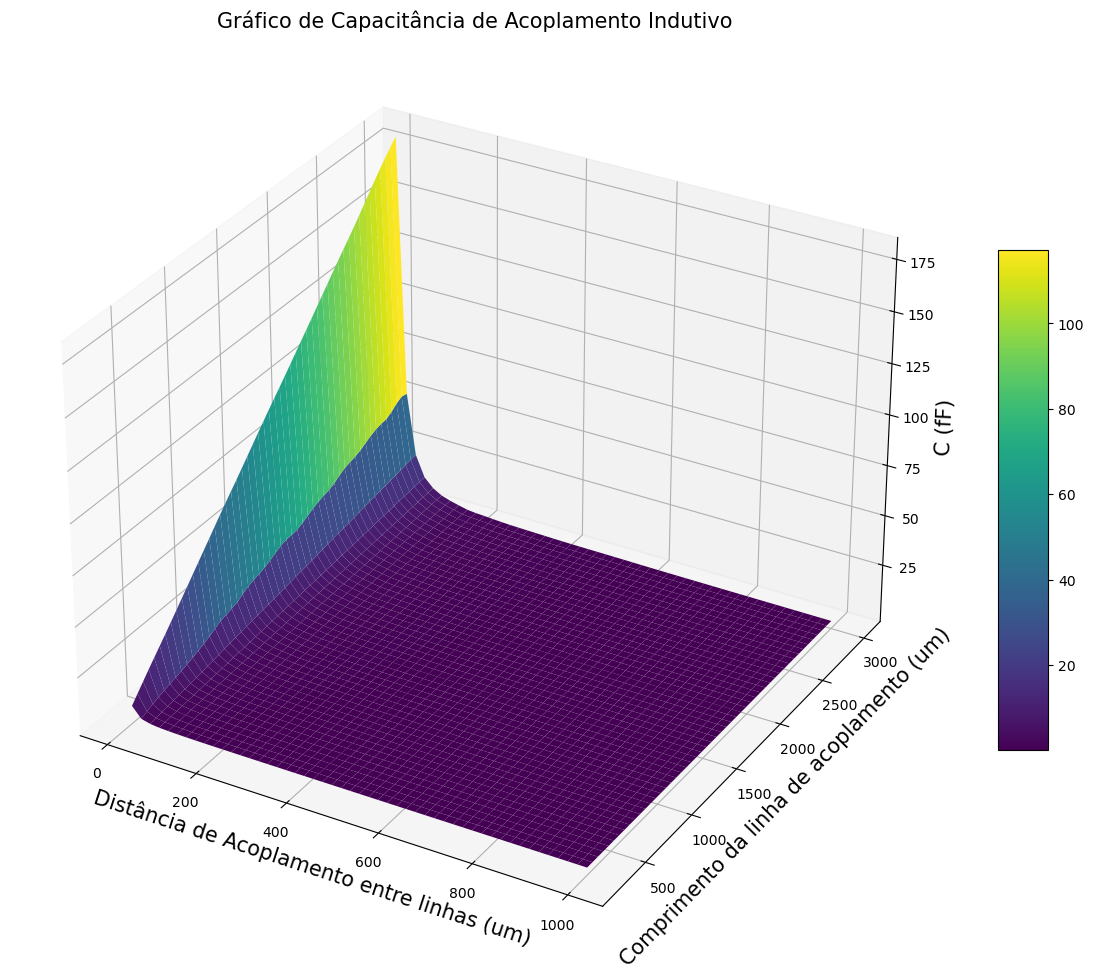

In [33]:
# Método do Diego
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Dados fornecidos
d = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200, 225, 250, 275, 300, 400, 500, 600, 700, 800, 900, 1000])
lc = np.array([250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000])
C_values = np.array([
    [7.44349, 4.57374, 2.42392, 1.69362, 1.26934, 0.99029, 0.80536, 0.67944, 0.58712, 0.51015, 0.37746, 0.29192, 0.23557, 0.20609, 0.17899, 0.15786, 0.13926, 0.12592, 0.09065, 0.0709, 0.05465, 0.04392, 0.03588, 0.03045, 0.02446], #l=0.25mm
    [23.34691, 15.78588, 7.21642, 4.64871, 3.31759, 2.48330, 1.94971, 1.59232, 1.34732, 1.14404, 0.81207, 0.60787, 0.44874, 0.38434, 0.32655, 0.27867, 0.23938, 0.21511, 0.14075, 0.11088, 0.07856, 0.06126, 0.04916, 0.04163, 0.03278], #l=0.5mm
    [55.1811, 38.19295, 16.86268, 10.59055, 7.41747, 5.48050, 4.23117, 3.41238, 2.86691, 2.41352, 1.68313, 1.24465, 0.87796, 0.74523, 0.62864, 0.52496, 0.44177, 0.39571, 0.24401, 0.19187, 0.12725, 0.09706, 0.07728, 0.06445, 0.04967], #l=1mm
    [71.15746, 49.40971, 21.60734, 13.5647, 9.47785, 6.98287, 5.37988, 4.31614, 3.62244, 3.04186, 2.11887, 1.56116, 1.09139, 0.92678, 0.77933, 0.64867, 0.54333, 0.48591, 0.29588, 0.23257, 0.15248, 0.11528, 0.09151, 0.07714, 0.05883], #l=1.25mm
    [86.95884, 60.50366, 26.46655, 16.51036, 11.49947, 8.46002, 6.51865, 5.23014, 4.37247, 3.67349, 2.55235, 1.87667, 1.30303, 1.10375, 0.92646, 0.76797, 0.64199, 0.57491, 0.34744, 0.27107, 0.17531, 0.13221, 0.10546, 0.08802, 0.06744], #l=1.5mm
    [102.51412, 71.68452, 31.26583, 19.48614, 13.56111, 9.97422, 7.67826, 6.12571, 5.12469, 4.30633, 2.98927, 2.19591, 1.52208, 1.28996, 1.08063, 0.89511, 0.74684, 0.66852, 0.40033, 0.31182, 0.20209, 0.15226, 0.12073, 0.10165, 0.07709], #l=1.75mm
    [118.14665, 82.07160, 36.05388, 22.54284, 15.70175, 11.48056, 8.81943, 7.02137, 5.87484, 4.94134, 3.42829, 2.51609, 1.73714, 1.47223, 1.23448, 1.01940, 0.84976, 0.75957, 0.45391, 0.35432, 0.22717, 0.1712, 0.13553, 0.11341, 0.08626], #l=2mm
    [134.07337, 93.79644, 40.77429, 25.49456, 17.75012, 12.96455, 9.98785, 7.96077, 6.63177, 5.57507, 3.86938, 2.83392, 1.95476, 1.65591, 1.38797, 1.14611, 0.95181, 0.85103, 0.50732, 0.39339, 0.2524, 0.1899, 0.15031, 0.12584, 0.09583], #l=2.25mm
    [149.81971, 105.07654, 45.66051, 28.50098, 19.86220, 14.49460, 11.13628, 8.87108, 7.40800, 6.21497, 4.31170, 3.15340, 2.17198, 1.84003, 1.54265, 1.27010, 1.05577, 0.94395, 0.56107, 0.43274, 0.27844, 0.20852, 0.16463, 0.13878, 0.10497], #l=2.5mm
    [166.29534, 115.92900, 50.38771, 31.44036, 21.98159, 16.00757, 12.31854, 9.83690, 8.18736, 6.86023, 4.75883, 3.47976, 2.38913, 2.02414, 1.69478, 1.39418, 1.15870, 1.03626, 0.61402, 0.47439, 0.30284, 0.22848, 0.18013, 0.15111, 0.11367], #l=2.75mm
    [181.56762, 126.36801, 55.07894, 34.26504, 23.99616, 17.48828, 13.44408, 10.70722, 8.95262, 7.48684, 5.19165, 3.80171, 2.59584, 2.20653, 1.84567, 1.51764, 1.26259, 1.12897, 0.66739, 0.51423, 0.3286, 0.24655, 0.19499, 0.16422, 0.12288] #l=3mm
]).T

# Criando a grade de interpolação
D, Lc = np.meshgrid(np.linspace(d.min(), d.max(), 50), np.linspace(lc.min(), lc.max(), 50))
points = np.array([(di, lci) for di in d for lci in lc])
values = C_values.flatten()
C_interp = griddata(points, values, (D, Lc), method='cubic')

# Criando a figura 3D
fig = plt.figure(figsize=(15, 13))
ax = fig.add_subplot(111, projection='3d')

# Plotando a superfície interpolada
surf = ax.plot_surface(D, Lc, C_interp, cmap='viridis', edgecolor='none')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

# Rótulos dos eixos
ax.set_xlabel('Distância de Acoplamento entre linhas (um)', fontsize=15)
ax.set_ylabel('Comprimento da linha de acoplamento (um)', fontsize=15)
ax.set_zlabel('C (fF)', fontsize=15)
ax.set_title('Gráfico de Capacitância de Acoplamento Indutivo', fontsize=15)

# Exibindo o gráfico
plt.show()

# Teste de fit

Ajuste: A=0.100, B=0.050, C=1.000


D:\Users\e196203\AppData\Local\Temp\11\ipykernel_51408\2972702990.py:33: RuntimeWarning: overflow encountered in exp
  return A *y* np.exp(-B * x)


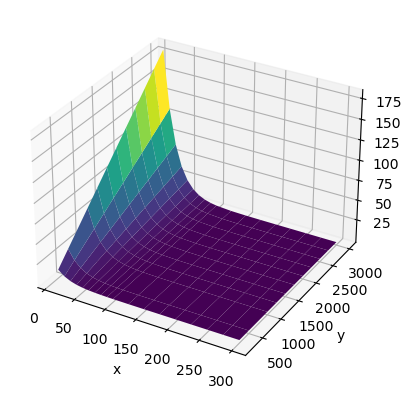

In [95]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Malha de pontos
x = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200, 225, 250, 275, 300]) # distancia
y = np.array([250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000]) # comprimento
Z = np.array([
    [7.44349, 4.57374, 2.42392, 1.69362, 1.26934, 0.99029, 0.80536, 0.67944, 0.58712, 0.51015, 0.37746, 0.29192, 0.23557, 0.20609, 0.17899, 0.15786, 0.13926, 0.12592], #l=0.25mm
    [23.34691, 15.78588, 7.21642, 4.64871, 3.31759, 2.48330, 1.94971, 1.59232, 1.34732, 1.14404, 0.81207, 0.60787, 0.44874, 0.38434, 0.32655, 0.27867, 0.23938, 0.21511], #l=0.5mm
    [55.1811, 38.19295, 16.86268, 10.59055, 7.41747, 5.48050, 4.23117, 3.41238, 2.86691, 2.41352, 1.68313, 1.24465, 0.87796, 0.74523, 0.62864, 0.52496, 0.44177, 0.39571], #l=1mm
    [71.15746, 49.40971, 21.60734, 13.5647, 9.47785, 6.98287, 5.37988, 4.31614, 3.62244, 3.04186, 2.11887, 1.56116, 1.09139, 0.92678, 0.77933, 0.64867, 0.54333, 0.48591], #l=1.25mm
    [86.95884, 60.50366, 26.46655, 16.51036, 11.49947, 8.46002, 6.51865, 5.23014, 4.37247, 3.67349, 2.55235, 1.87667, 1.30303, 1.10375, 0.92646, 0.76797, 0.64199, 0.57491], #l=1.5mm
    [102.51412, 71.68452, 31.26583, 19.48614, 13.56111, 9.97422, 7.67826, 6.12571, 5.12469, 4.30633, 2.98927, 2.19591, 1.52208, 1.28996, 1.08063, 0.89511, 0.74684, 0.66852], #l=1.75mm
    [118.14665, 82.07160, 36.05388, 22.54284, 15.70175, 11.48056, 8.81943, 7.02137, 5.87484, 4.94134, 3.42829, 2.51609, 1.73714, 1.47223, 1.23448, 1.01940, 0.84976, 0.75957], #l=2mm
    [134.07337, 93.79644, 40.77429, 25.49456, 17.75012, 12.96455, 9.98785, 7.96077, 6.63177, 5.57507, 3.86938, 2.83392, 1.95476, 1.65591, 1.38797, 1.14611, 0.95181, 0.85103], #l=2.25mm
    [149.81971, 105.07654, 45.66051, 28.50098, 19.86220, 14.49460, 11.13628, 8.87108, 7.40800, 6.21497, 4.31170, 3.15340, 2.17198, 1.84003, 1.54265, 1.27010, 1.05577, 0.94395], #l=2.5mm
    [166.29534, 115.92900, 50.38771, 31.44036, 21.98159, 16.00757, 12.31854, 9.83690, 8.18736, 6.86023, 4.75883, 3.47976, 2.38913, 2.02414, 1.69478, 1.39418, 1.15870, 1.03626], #l=2.75mm
    [181.56762, 126.36801, 55.07894, 34.26504, 23.99616, 17.48828, 13.44408, 10.70722, 8.95262, 7.48684, 5.19165, 3.80171, 2.59584, 2.20653, 1.84567, 1.51764, 1.26259, 1.12897] #l=3mm
]) # capacitancias

X, Y = np.meshgrid(x,y)

# Transformar em 1D para usar em fitting
x_data = X.ravel()
y_data = Y.ravel()
z_data = Z.ravel()

# Definindo a função com exp em x e linear em y
def model(coords, A, B, C, D):
    x, y = coords
    return A *y* np.exp(-B * x)

# Ajuste
popt, _ = curve_fit(model, (x_data, y_data), z_data)

# Parametros ajustados
A, B, C, D = popt
print(f'Ajuste: A={A:.3f}, B={B:.3f}, C={C:.3f}')

# Função ajustada
def z_fit(x, y):
    return A *y* np.exp(-B * x)

x_fit = x
y_fit = y
X_fit, Y_fit = np.meshgrid(x_fit, y_fit)
Z_fit = z_fit(X_fit, Y_fit)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_fit, Y_fit, Z_fit, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

# Modelo 3

Ajuste: A=30.000, B=1.200, C=2.000, D=2.000


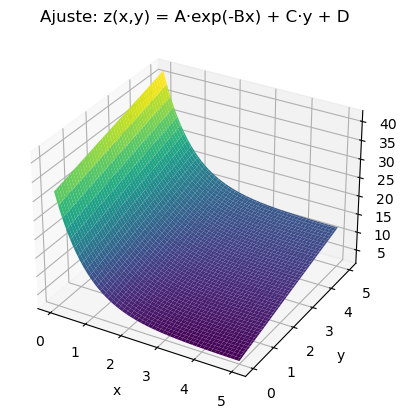

In [87]:
# Exemplo de dados (substitua pelos seus reais)
x = np.linspace(0, 5, 30)
y = np.linspace(0, 5, 30)
X, Y = np.meshgrid(x, y)
Z = 30 * np.exp(-1.2 * X) + 2 * Y + 2  # Modelo simulado

# Dados 1D para fitting
x_data = X.ravel()
y_data = Y.ravel()
z_data = Z.ravel()

# Define a função com expo em x e linear em y
def model(coords, A, B, C, D):
    x, y = coords
    return A * np.exp(-B * x) + C * y + D

# Ajuste
popt, _ = curve_fit(model, (x_data, y_data), z_data)

# Parâmetros ajustados
A, B, C, D = popt
print(f"Ajuste: A={A:.3f}, B={B:.3f}, C={C:.3f}, D={D:.3f}")

# Função ajustada
def z_fit(x, y):
    return A * np.exp(-B * x) + C * y + D

# Visualização da função ajustada
x_fit = np.linspace(0, 5, 100)
y_fit = np.linspace(0, 5, 100)
X_fit, Y_fit = np.meshgrid(x_fit, y_fit)
Z_fit = z_fit(X_fit, Y_fit)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_fit, Y_fit, Z_fit, cmap='viridis')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Ajuste: z(x,y) = A·exp(-Bx) + C·y + D")
plt.show()

In [4]:
data3 = {
    'Comprimento (mm)': [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0],
    'Distância (µm)': [10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'Capacitância (fF)': [
    -12.19467, -0.80594, -0.33563, -0.20327, -0.14086, -0.10294, -0.07935, -0.06192, -0.04893, -0.03936, -0.03148, #l=0.25mm
    -27.79226, -1.46697, -0.54131, -0.30951, -0.20548, -0.14748, -0.11213, -0.08683, -0.06810, -0.05517, -0.04439, #l=0.5mm
    -59.27481, -2.78433, -0.95911, -0.52434, -0.33688, -0.23669, -0.17833, -0.13662, -0.10663, -0.08628, -0.06969,
    -75.26479, -3.45269, -1.16705, -0.63069, -0.40245, -0.28120, -0.21181, -0.16236, -0.12630, -0.10237, -0.08276,
    -90.47634, -4.11484, -1.37336, -0.73764, -0.46892, -0.32651, -0.24556, -0.18647, -0.14625, -0.11815, -0.09580,
    -106.60422, -4.76117, -1.57747, -0.84439, -0.53462, -0.37316, -0.28017, -0.21169, -0.16582, -0.13436, -0.10841,
    -121.32060, -5.41442, -1.80034, -0.95575, -0.59850, -0.41568, -0.31136, -0.23733, -0.18508, -0.14999, -0.12131,
    -137.17569, -6.13990, -1.99402, -1.05552, -0.66518, -0.46011, -0.34518, -0.26207, -0.20427, -0.16514, -0.13448,
    -152.59841, -6.75046, -2.20199, -1.16392, -0.73141, -0.50560, -0.37846, -0.28798, -0.22347, -0.18085, -0.14609,
    -167.91402, -7.45137, -2.42241, -1.26960, -0.79605, -0.54955, -0.41012, -0.31124, -0.24124, -0.19592, -0.15970,
    -183.51058, -8.12430, -2.61480, -1.38170, -0.86353, -0.59287, -0.44302, -0.33543, -0.26020, -0.21057, -0.17111
]}

df3 = pd.DataFrame(data3)

In [5]:
# 1. Desconsiderar a menor distância
df_filtrado = df3[df3['Distância (µm)'] != 10].copy()

# 2. Deixar os valores de capacitância positivos
df_filtrado['Capacitância (fF)'] = df_filtrado['Capacitância (fF)'].abs()

# 3. Preparar os dados para o gráfico de superfície (formato de grade)
df_pivot = df_filtrado.pivot(index='Distância (µm)', columns='Comprimento (mm)', values='Capacitância (fF)')

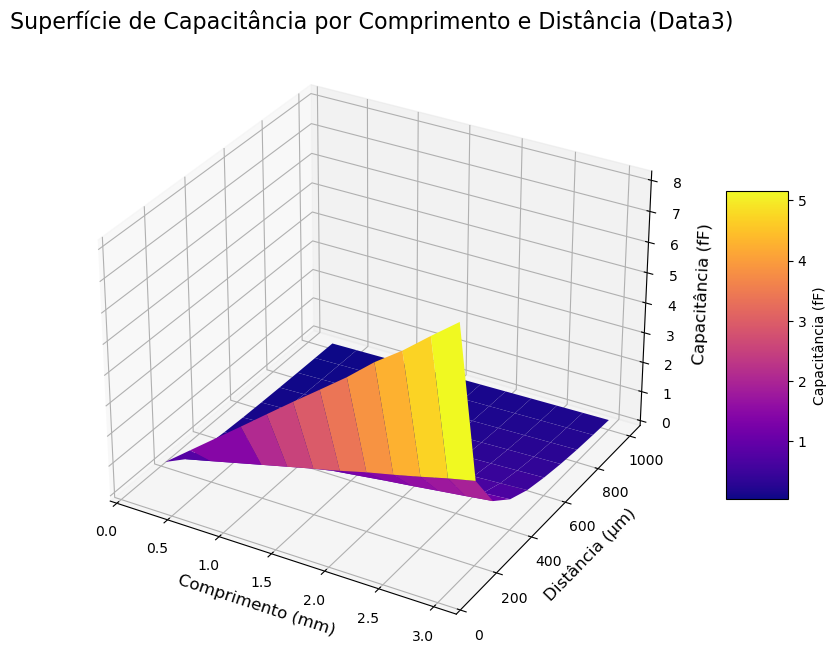

In [6]:
# Extrair os eixos X, Y e os valores de Z da grade
X_vals = df_pivot.columns.values
Y_vals = df_pivot.index.values
X, Y = np.meshgrid(X_vals, Y_vals)
Z = df_pivot.values

# 4. Criar o gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotar a superfície
surf = ax.plot_surface(X, Y, Z, cmap='plasma', edgecolor='none')

# 5. Configurar os eixos e títulos
ax.set_title('Superfície de Capacitância por Comprimento e Distância (Data3)', fontsize=16)
ax.set_xlabel('Comprimento (mm)', fontsize=12)
ax.set_ylabel('Distância (µm)', fontsize=12)
ax.set_zlabel('Capacitância (fF)', fontsize=12)

# Adicionar uma barra de cores para a legenda dos valores de Z
fig.colorbar(surf, shrink=0.5, aspect=5, label='Capacitância (fF)')

# 6. Forçar a origem dos eixos X e Y em 0,0
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_zlim(bottom=0)

plt.show()